In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

      sensor_1  sensor_2  sensor_3   sensor_4  sensor_5   sensor_6  sensor_7  \
0     0.382244  2.266563  2.192213  -0.148031 -0.263129   1.630089 -0.615190   
1    -3.828120  7.063966 -1.944734   4.876319 -0.007467  -2.306528  4.126048   
2     8.291928 -1.646423 -1.328611 -10.412410 -3.697388  -3.728005  2.817886   
3     2.071582  1.194780 -4.365761   3.556874  0.248929 -11.649356 -3.105932   
4     0.904102 -4.544324 -1.232763   0.521858  0.749688   0.821386 -6.217963   
...        ...       ...       ...        ...       ...        ...       ...   
4426 -2.065582       NaN  0.130114   0.022200  0.129365  -0.733171 -1.457876   
4427  0.822920       NaN       NaN   4.915701 -2.403510   1.902002       NaN   
4428  2.583740  8.066766 -0.868786   5.304028  2.133364   9.800570 -7.312995   
4429 -1.414143 -0.086515 -2.085999  -1.519791  0.748688   4.462642  4.395443   
4430 -1.900635  2.088499  0.662639  -7.275629       NaN  -0.277962 -5.151697   

       sensor_8  sensor_9  sensor_10  


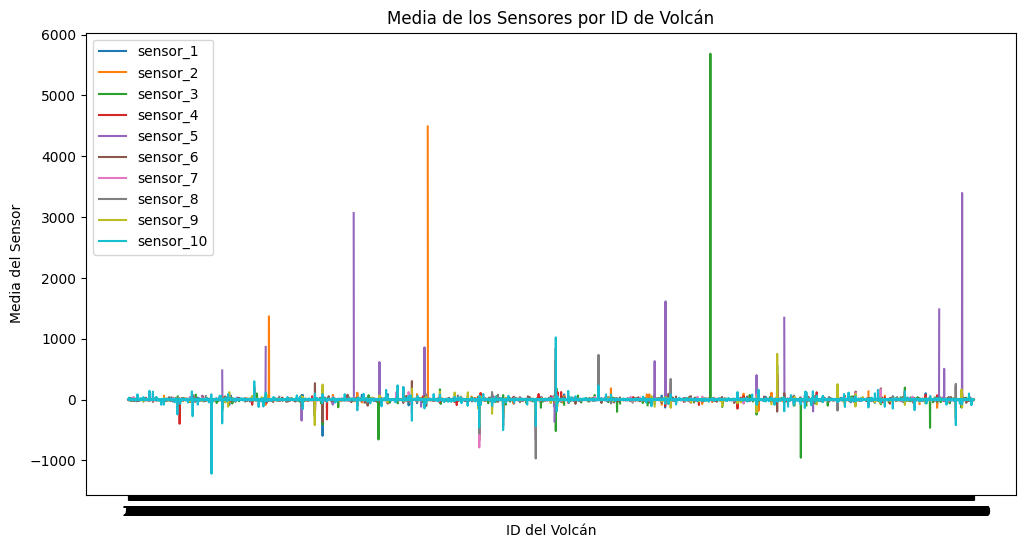

In [30]:
directorio = 'kaggle/input/train/'
medias_por_csv2 = []

for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'): 
        ruta_csv = os.path.join(directorio, archivo)  
        df = pd.read_csv(ruta_csv)
        media_sensor2 = df.mean()
        medias_por_csv2.append(media_sensor2)


medias_df2 = pd.concat(medias_por_csv2, axis=1).T
print(medias_df2)

plt.figure(figsize=(12, 6))
for sensor in medias_df2.columns:
    plt.plot(medias_df2.index, medias_df2[sensor], label=sensor)

plt.xlabel('ID del Volcán')
plt.ylabel('Media del Sensor')
plt.title('Media de los Sensores por ID de Volcán')
plt.legend()
plt.show()

        sensor_1     sensor_2    sensor_3    sensor_4    sensor_5    sensor_6  \
0     111.553322   451.741111  373.923764  231.812464  129.504432  222.294642   
1     532.160723  1650.496994  476.585275  641.979395  351.122983  685.131148   
2     608.823318  1939.668115  575.504044  738.979462  390.719763  693.831579   
3     414.293195   508.166881  521.171499  354.458483  201.339808  660.115239   
4     289.861921   507.888320  227.524454  248.357525  226.028373  259.918172   
...          ...          ...         ...         ...         ...         ...   
4426  223.901241          NaN  202.384308  266.459405  167.119927  228.496707   
4427  441.541874          NaN         NaN  566.920161  154.197289  757.366891   
4428  441.391224   597.364310  667.905792  447.592644  214.884344  744.656227   
4429  394.273260   434.413061  313.046505  293.875558  199.132527  445.396780   
4430  547.584091  1714.639007  537.697311  660.972926         NaN  651.895943   

        sensor_7    sensor_

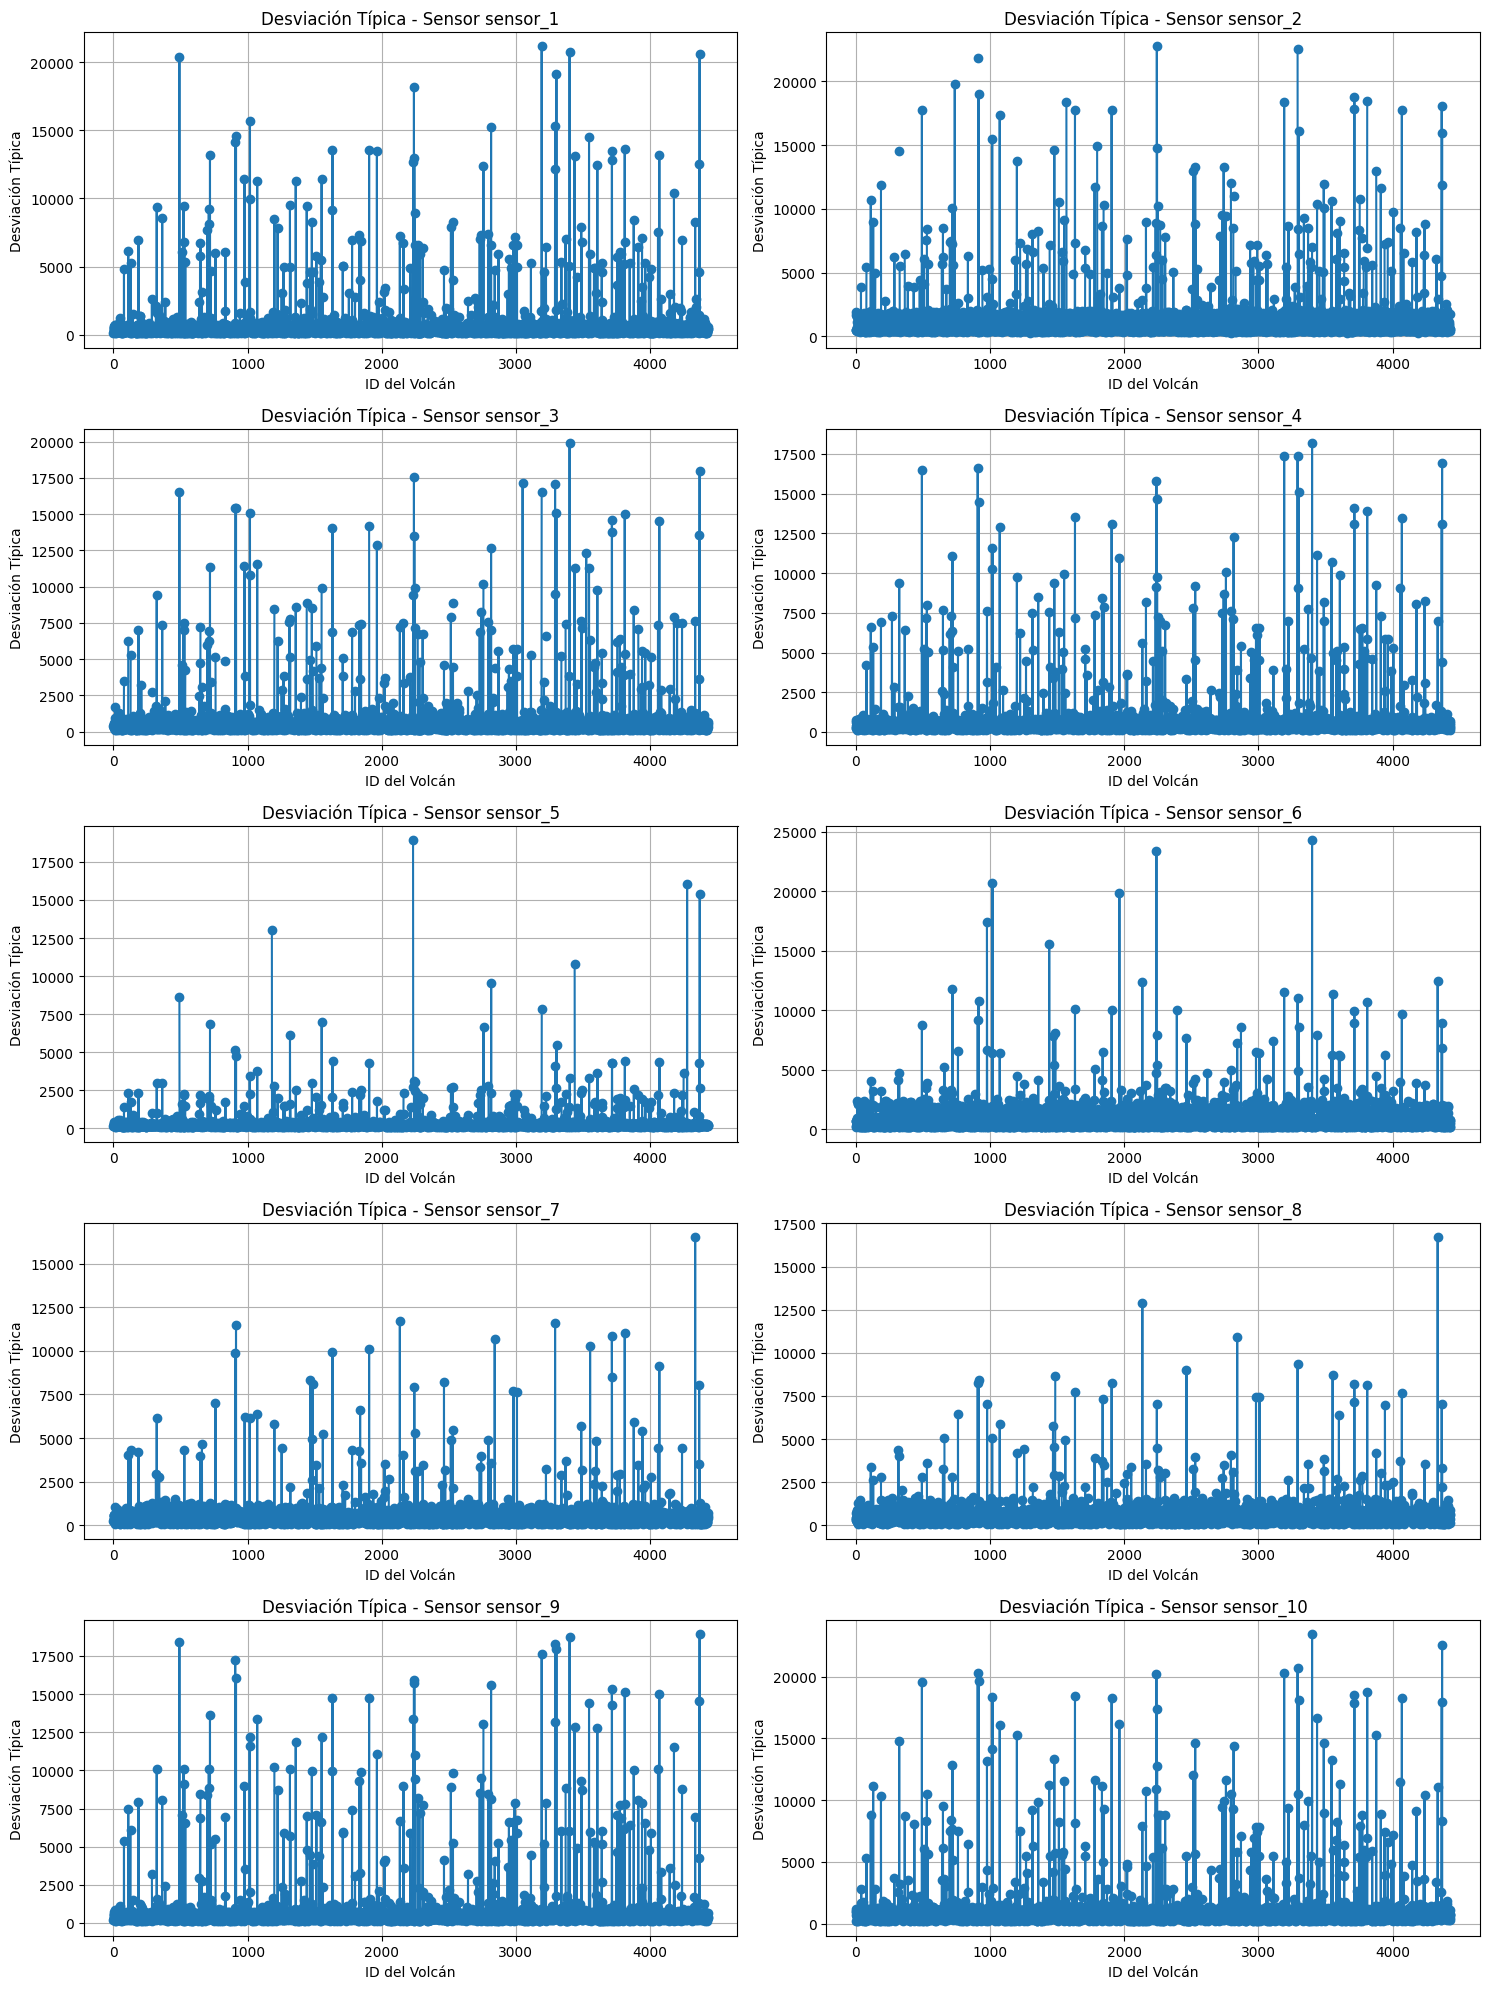

In [34]:
directorio = 'kaggle/input/train/'
desv_por_csv = []

for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'): 
        ruta_csv = os.path.join(directorio, archivo)  
        df = pd.read_csv(ruta_csv)
        desv_sensor = df.std()  # Calcular la desviación estándar en lugar de la media
        desv_por_csv.append(desv_sensor)

desv_df = pd.concat(desv_por_csv, axis=1).T
print(desv_df)

# Crear una lista de sensores
sensores = desv_df.columns

# Crear una figura con 10 subgráficos (uno para cada sensor)
plt.figure(figsize=(15, 20))
for i, sensor in enumerate(sensores, start=1):
    plt.subplot(5, 2, i)  # 5 filas, 2 columnas, índice del subgráfico
    plt.plot(desv_df.index, desv_df[sensor], marker='o')
    plt.xlabel('ID del Volcán')
    plt.ylabel('Desviación Típica')
    plt.title(f'Desviación Típica - Sensor {sensor}')
    plt.grid(True)

plt.tight_layout()  # Ajustar el espaciado entre subgráficos para mayor legibilidad
plt.show()

In [ ]:
directorio = 'pruebas2/'
medias_por_csv_test = []

for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'): 
        ruta_csv = os.path.join(directorio, archivo)  
        df = pd.read_csv(ruta_csv)
        media_sensor_test = df.mean()
        medias_por_csv_test.append(media_sensor_test)


medias_df_test = pd.concat(medias_por_csv_test, axis=1)
medias_df_test = medias_df_test.T
print(medias_df_test)

In [ ]:
#KNN
train_df = medias_df2
test_df = medias_df_test

def knn(train_df, test_df):
    #Eliminamos los valores nulos (NaN)
    train_df_clean = train_df.dropna()
    test_df_cleaned = test_df.dropna()

    knn_model = KNeighborsRegressor()
    knn_model.fit(train_df_clean, train_df_clean.index)

    y_pred_indices = knn_model.predict(test_df_cleaned)

    return y_pred_indices

y_pred_indices = knn(train_df, test_df)
print(y_pred_indices)